# DATA599-02:Python for Data Science - Final Project (Collaborative tasks)

## Members:
- Hans Lehndorff
- Isaac Johnson
- Jesse DeBolt
***

# **Introduction**

Coronary Heart Disease (CHD) is a significant health issue affecting millions of people worldwide. This project aims to predict the prevalence of CHD in different counties across the United States, focusing on potential health inequities in access to care between urban and rural areas. The hypothesis is that rural areas have worse health outcomes due to various factors, including limited access to healthcare facilities and resources.

# **Research Questions**

1. What is the prevalence of CHD in different counties, and how does it vary between urban and rural areas?
2. What are the key health and social environment variables that influence the prevalence of CHD?
3. How do these variables interact, and what is their relative importance in predicting CHD prevalence?

# **Data Sources**

The primary dataset for this project is sourced from the Centers for Disease Control and Prevention (CDC) [Interactive Atlas of Heart Disease and Stroke](https://nccd.cdc.gov/DHDSPAtlas/?state=County). This dataset is a culmination of several datasets, providing a comprehensive view of various health and social environment variables at the county level. These variables include demographic factors, health indicators, healthcare access, and social and economic factors. More details about the data sources can be found [here](https://www.cdc.gov/dhdsp/maps/atlas/data-sources.html#dataControls).
***

# **Methodology**

The project will employ various machine learning techniques using Python, including Random Forest, Principal Component Analysis (PCA), Radial Basis Function (RBF), and K-Nearest Neighbors (KNN). The Python libraries to be used include scikit-learn for machine learning, pandas for data manipulation, numpy for numerical computations, and matplotlib and seaborn for data visualization.  

The project will start with data cleaning and preprocessing, followed by exploratory data analysis to understand the data's characteristics. The machine learning models will be trained and tested using the processed data, with the aim of predicting the prevalence of CHD in different counties. The models' performance will be evaluated using appropriate metrics, and the results will be interpreted to answer the research questions.

# **Expected Outcomes** 

The project is expected to provide insights into the prevalence of CHD in different counties and the factors influencing it. It will also shed light on potential health inequities between urban and rural areas, contributing to the broader discourse on health disparities and access to care. The findings could inform policy-making and interventions aimed at reducing CHD prevalence and improving health outcomes, particularly in underserved areas.

# Setup

## Import needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


### Set working directory (if needed)

In [2]:
# Set working directory (modify as needed)
%cd -q "C:\Users\jesse\Documents\Schooling\Willamette-MSDS\1-DATA599-02_Python\Final\CHD_group_project"
#%cd -q "/Users/isaacjohnson/Documents/Scanner Output/School/Willamette/Python/Final Project/CHD_group_project"

### Importing data

In [3]:
# Import the dataset
cdc = pd.read_csv('data/CDC_for_python.csv')
cdc = cdc.loc[cdc.CHD > 0]

### View data structure

In [4]:
# View number of rows and columns
cdc.shape

(3141, 59)

***

# Data cleaning

## Removing US territories 

In [5]:
cdc = cdc[~cdc['display_name'].str.contains(r'\(AS\)|\(GU\)|\(MP\)|\(PR\)|\(County Equivalent\)')]

### View data structure

In [6]:
# View number of rows to confirm removal
cdc.shape

(3141, 59)

## Separate county and state

In [7]:
# Separate the 'display_name' column
cdc[['county', 'state']] = cdc['display_name'].str.extract(r'\"(.+), \((.+)\)\"', expand=True)

# Remove the original column
cdc = cdc.drop(['display_name'], axis=1)

In [8]:
cdc.head()

,fips,Age65Plus,AIAN,AIANmen,AIANwomen,ANHPI,ANHPImen,ANHPIwomen,Black,BlackMen,...,Broadband,EdLessColl,SNAPrecipients,MedHomeValue,MedHouseIncome,Poverty,Unemploy,UrbanRural,county,state
0,2013,11.2,1090,607,483,798,373,425,129,119,...,42.1,83.4,2.6,137000,79000,15.1,2.3,4,Aleutians East,AK
1,2016,7.5,465,249,216,2169,1351,818,167,147,...,21.0,83.0,1.4,317000,92000,8.1,3.6,4,Aleutians West,AK
2,2020,11.1,15672,6555,9117,26122,11599,14523,11790,6228,...,8.0,63.4,9.7,320000,85000,8.3,5.8,3,Anchorage,AK
3,2050,7.4,9390,4848,4542,221,95,126,139,103,...,26.6,88.7,37.7,89000,52000,25.3,13.1,4,Bethel,AK
4,2060,11.6,187,101,86,26,0,26,4,4,...,19.0,74.2,6.5,222000,87000,10.7,5.6,4,Bristol Bay,AK


## Relabeling Urban/Rural codes

In [9]:
#change rural/urban
# 1 = Large central metro -> Large_Urban
# 2 = Large fringe metro -> LargeFringe_Urban
# 3 = Medium/small metro -> MediumSmall_Urban
# 4 = Nonmetro -> Rural

# Replace values in 'UrbanRural' column
cdc['UrbanRural'] = cdc['UrbanRural'].replace({1: 'Large_Urban', 2: 'LargeFringe_Urban', 3: 'MediumSmall_Urban', 4: 'Rural'})

# Replace -1 with NaN
cdc = cdc.replace(-1, np.nan)

### Review header names, check for missing rural/urban values

In [10]:
# Display column names
print(cdc.columns)

# Show unique values in 'UrbanRural'
print(cdc['UrbanRural'].unique())

# Create a subset where 'UrbanRural' is NaN, an empty string, or 'NA'
rural_query = cdc[cdc['UrbanRural'].isin([pd.np.nan, '', 'NA'])]

# Display the first 20 rows of this subset
rural_query.head(20)

Index(['fips', 'Age65Plus', 'AIAN', 'AIANmen', 'AIANwomen', 'ANHPI',
       'ANHPImen', 'ANHPIwomen', 'Black', 'BlackMen', 'BlackWomen', 'Hispanic',
       'HispanicMen', 'HispanicWomen', 'OtherRace', 'OtherRaceMen',
       'OtherRaceWomen', 'PopAllGenders', 'PopMen', 'PopWomen', 'pop',
       'TwoPlus', 'TwoPlusMen', 'TwoPlusWomen', 'White', 'WhiteMen',
       'WhiteWomen', 'bpmUse', 'CholScreen', 'CholMedNonAdhear',
       'CholMedElegible', 'cruParticipate', 'Hospitals', 'HospCIC', 'HospCR',
       'HospED', 'Pharmacies', 'HealthIns', 'CardioPhys', 'PrimaryCarePhys',
       'CHD', 'HighBP', 'Stroke', 'Diabetes', 'HighChol', 'Obesity',
       'PhysInactivity', 'Smoker', 'AirQuality', 'Parks', 'Broadband',
       'EdLessColl', 'SNAPrecipients', 'MedHomeValue', 'MedHouseIncome',
       'Poverty', 'Unemploy', 'UrbanRural', 'county', 'state'],
      dtype='object')
['Rural' 'MediumSmall_Urban' nan 'Large_Urban' 'LargeFringe_Urban']


,fips,Age65Plus,AIAN,AIANmen,AIANwomen,ANHPI,ANHPImen,ANHPIwomen,Black,BlackMen,...,Broadband,EdLessColl,SNAPrecipients,MedHomeValue,MedHouseIncome,Poverty,Unemploy,UrbanRural,county,state
25,2158,5.8,4431,2361,2070,17,13,4,39,39,...,33.9,96.7,48.7,73000,38000.0,27.9,19.9,NaN,Kusilvak,AK


## Inserting Rural/Urban for missing value

In [11]:
# Find and insert where county is 'Kusilvak' based on Wikipedia data.
cdc.loc[cdc['county'].str.contains('Kusilvak', na=False), 'UrbanRural'] = "Rural"

# Display unique values in the 'UrbanRural' column
print(cdc['UrbanRural'].unique())

# Double check for any NAs in Rural/Urban
rural_query = cdc[cdc['UrbanRural'].isin([None, "", "NA"])].head(20)
rural_query

['Rural' 'MediumSmall_Urban' 'Large_Urban' 'LargeFringe_Urban']


,fips,Age65Plus,AIAN,AIANmen,AIANwomen,ANHPI,ANHPImen,ANHPIwomen,Black,BlackMen,...,Broadband,EdLessColl,SNAPrecipients,MedHomeValue,MedHouseIncome,Poverty,Unemploy,UrbanRural,county,state


## Convert fips to string

In [12]:
cdc['fips'] = cdc['fips'].astype(str)

## Inserting Parks missing value

In [13]:
cdc.loc[cdc['county'].str.contains('Kusilvak', na=False), 'Parks'] = 66

### Checking for missing values

In [14]:
# Total number of missing values in dataset
total_na = cdc.isnull().sum().sum()
print(total_na)

# Total number of missing values in each column
column_na = cdc.isnull().sum()
print(column_na)

# Total number of missing values in each row
cdc['count_na'] = cdc.isnull().sum(axis=1)

# Sort by 'count_na'
cdc = cdc.sort_values(by='count_na', ascending=False)

3297
fips                   0
Age65Plus              0
AIAN                   0
AIANmen                0
AIANwomen              0
ANHPI                  0
ANHPImen               0
ANHPIwomen             0
Black                  0
BlackMen               0
BlackWomen             0
Hispanic               0
HispanicMen            0
HispanicWomen          0
OtherRace              0
OtherRaceMen           0
OtherRaceWomen         0
PopAllGenders          0
PopMen                 0
PopWomen               0
pop                    0
TwoPlus                0
TwoPlusMen             0
TwoPlusWomen           0
White                  0
WhiteMen               0
WhiteWomen             0
bpmUse                21
CholScreen            21
CholMedNonAdhear      81
CholMedElegible      111
cruParticipate       743
Hospitals              0
HospCIC                0
HospCR                 0
HospED                 0
Pharmacies             0
HealthIns              1
CardioPhys          1965
PrimaryCarePhys     

### Remove counties with minimal data

In [15]:
# Remove those that have more than 8 NAs in that row
cdc = cdc[cdc['count_na'] <= 8]

# Remove 'count_na' column
cdc = cdc.drop('count_na', axis=1)

## Inserting values for missing data for NJ
Note: These values were obtained from 500 Cities & Places data (https://chronicdata.cdc.gov/browse)

In [16]:
# bpmUse
cdc.loc[cdc['state'].str.contains('NJ', na=False), 'bpmUse'] = 71.71

# CholScreen
cdc.loc[cdc['state'].str.contains('NJ', na=False), 'CholScreen'] = 79.43

# HighBP
cdc.loc[cdc['state'].str.contains('NJ', na=False), 'HighBP'] = 33.7

# Diabetes
cdc.loc[cdc['state'].str.contains('NJ', na=False), 'Diabetes'] = 17.4

# HighChol
cdc.loc[cdc['state'].str.contains('NJ', na=False), 'HighChol'] = 32.41

# Obesity
cdc.loc[cdc['state'].str.contains('NJ', na=False), 'Obesity'] = 33.59

## Inserting values for missing values in Median Home Value
Note: these values were obtained from city-data.com (https://www.city-data.com)

In [17]:
cdc.loc[cdc['fips'].str.contains('48261', na=False), 'MedHomeValue'] = 42550
cdc.loc[cdc['fips'].str.contains('48301', na=False), 'MedHomeValue'] = 38143
cdc.loc[cdc['fips'].str.contains('46017', na=False), 'MedHomeValue'] = 101393
cdc.loc[cdc['fips'].str.contains('46095', na=False), 'MedHomeValue'] = 60537

## Inserting missing values for PCP and Cardio Phys

In [18]:
# Read in dataset with values for merging
pcp_cardio_count = pd.read_csv("data/pcp_cardio_count.csv")

# Convert the 'COUNTY' column to string
pcp_cardio_count['COUNTY'] = pcp_cardio_count['COUNTY'].astype(str)

# Joining count data frame to the cdc data frame
cdc = cdc.merge(pcp_cardio_count, left_on='fips', right_on='COUNTY', how='left')

# Use fillna to replace NAs in PCP and CardioPhys
cdc['pcp'] = cdc['pcp'].fillna(cdc['PrimaryCarePhys'])
cdc['CardioPhys'] = cdc['CardioPhys'].fillna(cdc['cardio'])

# Remove the temporary columns
cdc = cdc.drop(['PrimaryCarePhys', 'cardio', 'COUNTY'], axis=1)

#### Check entire data frame for remaining missing or NA values

In [19]:
# Check DataFrame for missing or NA values, but only display columns with missing values
missing_values = cdc.isnull().sum()
missing_values = missing_values[missing_values != 0]
print(missing_values)

CholMedNonAdhear      80
CholMedElegible      110
cruParticipate       742
CardioPhys          1493
PhysInactivity        21
AirQuality            24
pcp                   25
dtype: int64


### Display data frame

In [20]:
cdc

,fips,Age65Plus,AIAN,AIANmen,AIANwomen,ANHPI,ANHPImen,ANHPIwomen,Black,BlackMen,...,EdLessColl,SNAPrecipients,MedHomeValue,MedHouseIncome,Poverty,Unemploy,UrbanRural,county,state,pcp
0,34027,17.1,446,213,233,39922,19200,20722,13116,6312,...,44.7,2.5,462000,114000.0,4.7,5.0,LargeFringe_Urban,Morris,NJ,1.0
1,34025,17.7,781,508,273,26636,12508,14128,33615,15605,...,52.7,4.5,435000,104000.0,5.9,5.5,LargeFringe_Urban,Monmouth,NJ,0.8
2,34017,12.0,2619,1539,1080,88314,44162,44152,63097,29672,...,56.0,13.1,401000,77000.0,13.1,6.8,Large_Urban,Hudson,NJ,1.8
3,34041,18.1,135,75,60,2178,1107,1071,3878,1964,...,65.5,6.1,266000,80000.0,7.3,5.5,MediumSmall_Urban,Warren,NJ,1.6
4,34039,14.5,1425,865,560,23289,10781,12508,92839,42103,...,62.9,7.1,379000,83000.0,9.2,6.7,Large_Urban,Union,NJ,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,13157,14.4,7,7,0,948,444,504,3720,1980,...,76.5,9.1,210000,71000.0,9.1,2.4,Rural,Jackson,GA,140.0
3136,13153,12.7,904,193,711,4154,1488,2666,35261,16097,...,69.0,13.4,157000,69000.0,10.8,3.6,MediumSmall_Urban,Houston,GA,144.0
3137,13139,15.0,326,187,139,3035,1267,1768,11120,5338,...,76.0,9.8,213000,68000.0,12.7,2.7,MediumSmall_Urban,Hall,GA,524.0
3138,31019,14.6,69,30,39,652,358,294,369,204,...,66.2,6.2,185000,69000.0,9.5,2.0,Rural,Buffalo,NE,100.0


# Data Engineering

## Impute for missing values

In [21]:
from sklearn.impute import SimpleImputer

# Specify the columns you want to impute
columns_to_impute = ['CholMedNonAdhear', 'CholMedElegible', 'cruParticipate', 'CardioPhys', 'PhysInactivity', 'AirQuality', 'pcp']

# Subset the DataFrame to only these columns
subset_cdc = cdc[columns_to_impute]

# Create an imputer object
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to the data and transform the data
imputed_data = imputer.fit_transform(subset_cdc)

# Convert the result back to a DataFrame
imputed_data = pd.DataFrame(imputed_data, columns=subset_cdc.columns)

# Replace the original columns in the DataFrame with the imputed data
cdc[columns_to_impute] = imputed_data


## Changing UrbanRural to True/False

In [22]:
cdc['IsRural'] = cdc['UrbanRural'] == 'Rural'

# Checking status of new column
print(cdc.IsRural.unique())
print(cdc['IsRural'].dtype)


[False  True]
bool


## Create classes for CHD prevalence

In [23]:
# Define the boundaries for the quantiles
quantiles = cdc['CHD'].quantile([0.33, 0.66]).values

# Function to classify 'CHD' values
def classify_chd(value):
    if value <= quantiles[0]:
        return 'Low'
    elif value <= quantiles[1]:
        return 'Medium'
    else:
        return 'High'

# Add 'CHD_Class' column
cdc['CHD_Class'] = cdc['CHD'].apply(classify_chd)

# Print the dataframe
print(cdc)


       fips  Age65Plus  AIAN  AIANmen  AIANwomen  ANHPI  ANHPImen  ANHPIwomen  \
0     34027       17.1   446      213        233  39922     19200       20722   
1     34025       17.7   781      508        273  26636     12508       14128   
2     34017       12.0  2619     1539       1080  88314     44162       44152   
3     34041       18.1   135       75         60   2178      1107        1071   
4     34039       14.5  1425      865        560  23289     10781       12508   
...     ...        ...   ...      ...        ...    ...       ...         ...   
3135  13157       14.4     7        7          0    948       444         504   
3136  13153       12.7   904      193        711   4154      1488        2666   
3137  13139       15.0   326      187        139   3035      1267        1768   
3138  31019       14.6    69       30         39    652       358         294   
3139  21101       17.6    75       44         31    160        68          92   

      Black  BlackMen  ... 

## Add classification column for region

In [24]:
# Define the regions
regions = {
    'Northeast': ['CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NJ', 'NY', 'PA'],
    'Midwest': ['IL', 'IN', 'MI', 'OH', 'WI', 'IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD'],
    'South': ['DE', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'DC', 'WV', 'AL', 'KY', 'MS', 'TN', 'AR', 'LA', 'OK', 'TX'],
    'West': ['AZ', 'CO', 'ID', 'MT', 'NV', 'NM', 'UT', 'WY', 'AK', 'CA', 'HI', 'OR', 'WA']
}

# Function to assign region based on state
def assign_region(state):
    for region, states in regions.items():
        if state in states:
            return region
    return 'Other'

# Add 'region' column
cdc['region'] = cdc['state'].apply(assign_region)

# Print the updated DataFrame
print(cdc)

       fips  Age65Plus  AIAN  AIANmen  AIANwomen  ANHPI  ANHPImen  ANHPIwomen  \
0     34027       17.1   446      213        233  39922     19200       20722   
1     34025       17.7   781      508        273  26636     12508       14128   
2     34017       12.0  2619     1539       1080  88314     44162       44152   
3     34041       18.1   135       75         60   2178      1107        1071   
4     34039       14.5  1425      865        560  23289     10781       12508   
...     ...        ...   ...      ...        ...    ...       ...         ...   
3135  13157       14.4     7        7          0    948       444         504   
3136  13153       12.7   904      193        711   4154      1488        2666   
3137  13139       15.0   326      187        139   3035      1267        1768   
3138  31019       14.6    69       30         39    652       358         294   
3139  21101       17.6    75       44         31    160        68          92   

      Black  BlackMen  ... 

### Check entire data frame for remaining missing or NA values

In [25]:
# Check DataFrame for missing or NA values, but only display columns with missing values
missing_values = cdc.isnull().sum()
missing_values = missing_values[missing_values != 0]
print(missing_values)

Series([], dtype: int64)


### Check variable class types

In [26]:
unique_dtypes = np.unique(cdc.dtypes)
print(unique_dtypes)

[dtype('bool') dtype('int64') dtype('float64') dtype('O')]


In [27]:
for column in cdc.columns:
    print(f"{column}: {cdc[column].dtype}")

fips: object
Age65Plus: float64
AIAN: int64
AIANmen: int64
AIANwomen: int64
ANHPI: int64
ANHPImen: int64
ANHPIwomen: int64
Black: int64
BlackMen: int64
BlackWomen: int64
Hispanic: int64
HispanicMen: int64
HispanicWomen: int64
OtherRace: int64
OtherRaceMen: int64
OtherRaceWomen: int64
PopAllGenders: int64
PopMen: int64
PopWomen: int64
pop: int64
TwoPlus: int64
TwoPlusMen: int64
TwoPlusWomen: int64
White: int64
WhiteMen: int64
WhiteWomen: int64
bpmUse: float64
CholScreen: float64
CholMedNonAdhear: float64
CholMedElegible: float64
cruParticipate: float64
Hospitals: int64
HospCIC: int64
HospCR: int64
HospED: int64
Pharmacies: float64
HealthIns: float64
CardioPhys: float64
CHD: float64
HighBP: float64
Stroke: float64
Diabetes: float64
HighChol: float64
Obesity: float64
PhysInactivity: float64
Smoker: float64
AirQuality: float64
Parks: float64
Broadband: float64
EdLessColl: float64
SNAPrecipients: float64
MedHomeValue: int64
MedHouseIncome: float64
Poverty: float64
Unemploy: float64
UrbanRur

### Export data frame to csv file

In [28]:
cdc.to_csv('data/CDC_python_clean.csv', index=False)

# Data Visualization

## Load libraries and read in data

In [29]:
chd = pd.read_csv("data/CDC_for_python.csv")
chd = chd.loc[chd.CHD > 0]

## Scatter plot for a variety of variables against variable of interest

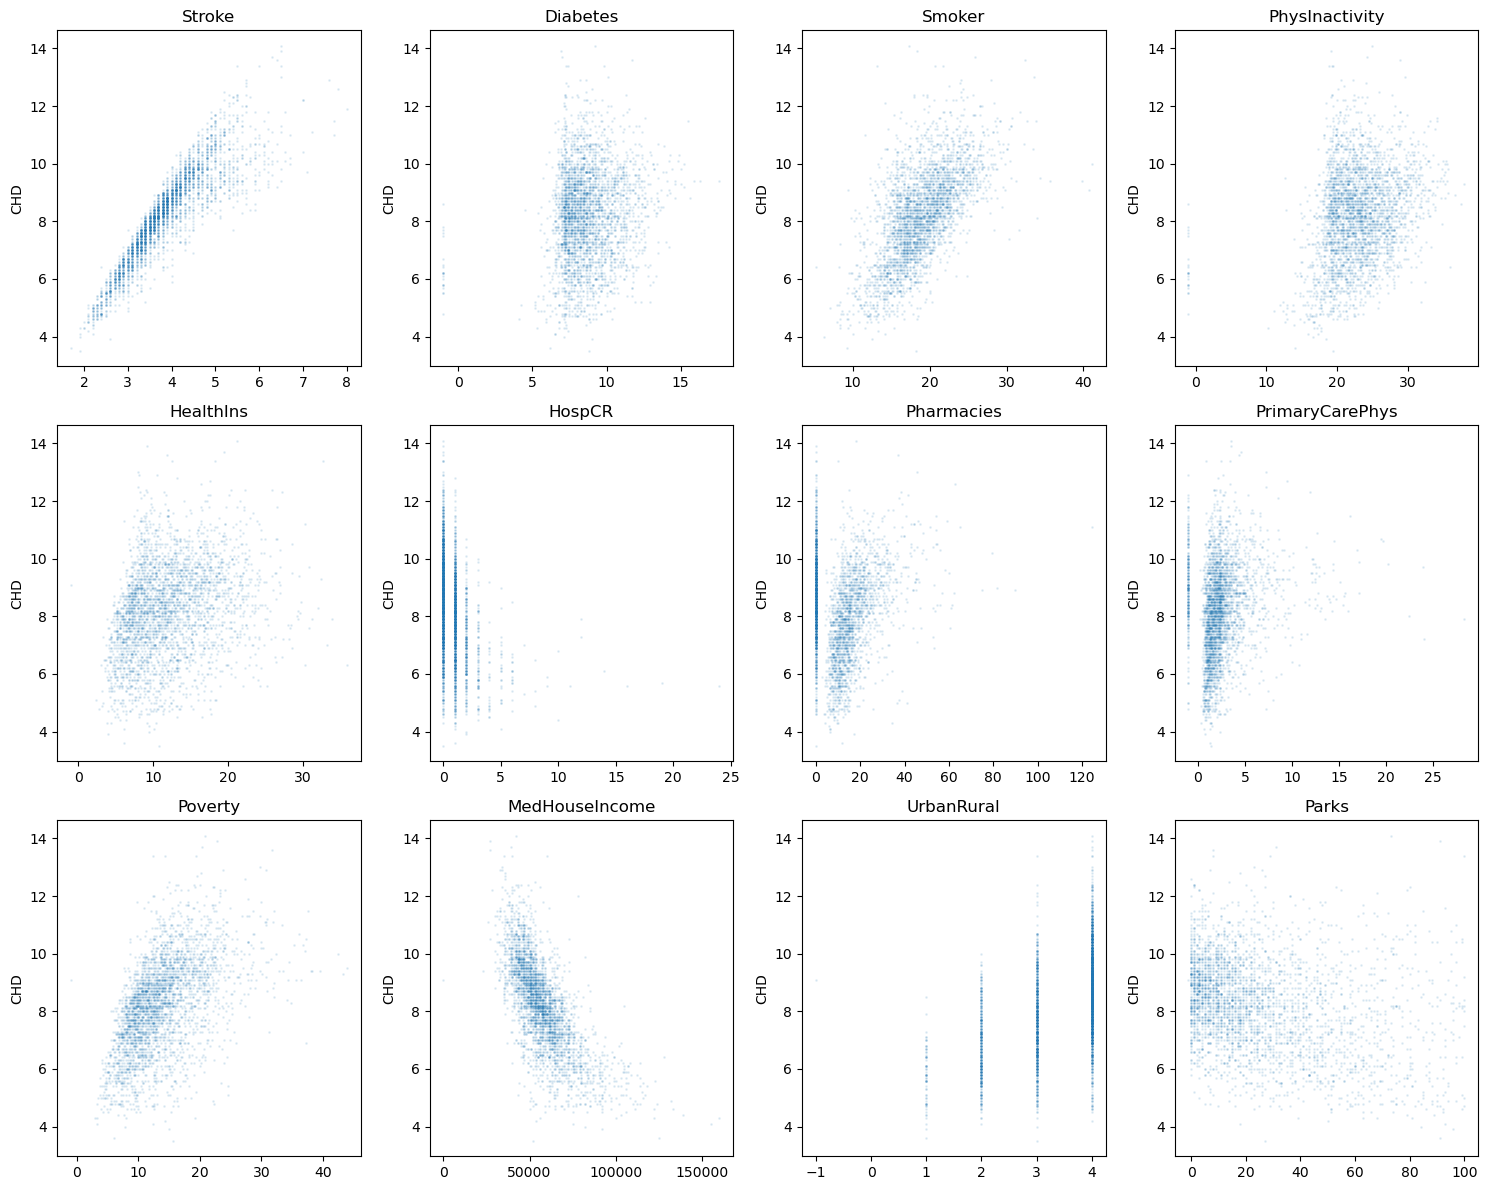

In [30]:
#Scatter plot for a variety of variables against variable of interest
# Create a 3x4 grid of subplots (12 subplots in total)
num_rows = 3
num_cols = 4

# Adjust the figure size according to your preference
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))

# Flatten the axes array for easier iteration
axes = axes.ravel()

col_list = ('Stroke', 'Diabetes', 'Smoker', 'PhysInactivity',
            'HealthIns', 'HospCR', 'Pharmacies', 'PrimaryCarePhys',
            'Poverty', 'MedHouseIncome', 'UrbanRural', 'Parks'
            )

# Plot each independent variable against the dependent variable in each subplot
for i, ax in enumerate(axes):
    ax.scatter(chd[col_list[i]], chd.CHD, s=1, alpha=0.1)
    ax.set_title(f"{col_list[i]}")
    ax.set_ylabel("CHD")

# Adjust spacing between subplots for better visualization
plt.tight_layout()

# Display the plot
plt.show()

## Function for heat map where cells are filled by average of variable of interest

In [31]:
import matplotlib.pyplot as plt2

# Create a heatmap with automatically binned continuous variables and average Z value in each bin
def create_heatmap(x_data, y_data, z_data, x_label, y_label, z_label):
    # Combine the data into a DataFrame
    data = pd.DataFrame({'X': x_data, 'Y': y_data, 'Z': z_data})

    # Determine the number of bins (you can adjust this as needed)
    num_bins = 20

    # Use pandas cut function to create bins for X and Y variables
    data['X_bin'] = pd.cut(data['X'], bins=num_bins, labels=False)
    data['Y_bin'] = pd.cut(data['Y'], bins=num_bins, labels=False)

    # Group the data by the bins and calculate the average Z value in each bin
    heatmap_data = data.groupby(['X_bin', 'Y_bin'])['Z'].mean().unstack()

    # Create the heatmap using a separate figure
    plt2.figure(figsize=(8, 6))
    sns.heatmap(heatmap_data, cmap='viridis', annot=False, fmt=".2f", cbar_kws={'label': z_label})
    plt2.xlabel(x_label)
    plt2.ylabel(y_label)
    plt2.title(f'Heatmap of {z_label} by {x_label} and {y_label}')
    plt2.show()

### Call the function with data and labels

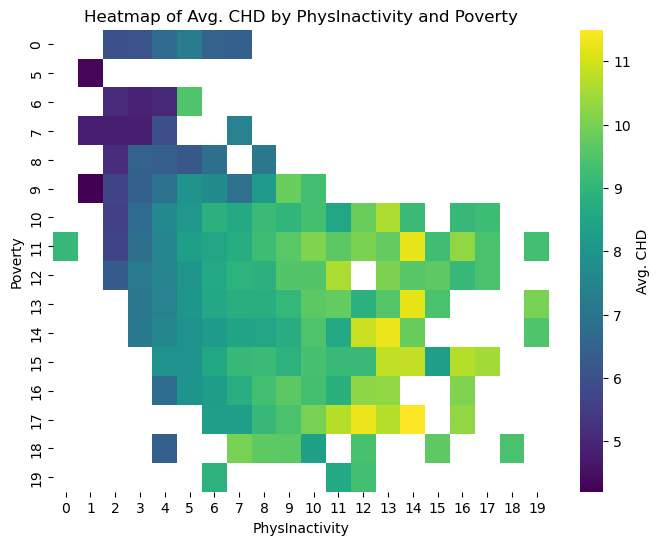

In [32]:
create_heatmap(chd.PhysInactivity, chd.Poverty, chd.CHD, 'PhysInactivity', 'Poverty', 'Avg. CHD')

# Machine Learning Models - Random Forest

## Random Forest - Setup

### Import libraries

In [33]:
from sklearn.model_selection import train_test_split
from scipy.stats import randint
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

### Import data

In [34]:
chd = pd.read_csv("data/CDC_python_clean.csv")

### View data structure

In [35]:
chd.CHD_Class.value_counts()

Low       1090
Medium    1040
High      1010
Name: CHD_Class, dtype: int64

## Random Forest - Data Cleaning (Preprocessing)

### Drop unneeded columns

In [36]:
columns_to_drop = ['fips', 'CHD', 'county','UrbanRural']
chd = chd.drop(columns=columns_to_drop)

### Establish X and y

In [37]:
X = chd.drop(columns=['CHD_Class'])
y = chd['CHD_Class']

### Additional preprocessing

In [38]:
# Get the character columns that need to be dummy encoded
char_cols = X.select_dtypes(include=['object']).columns

# Create a one-hot encoder and apply it to the character columns
encoder = OneHotEncoder()
X = pd.get_dummies(X, columns=char_cols, drop_first=True)

# Scale and Center
numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])


### View preprocessed data

In [39]:
# Final modeling dataset
X

,Age65Plus,AIAN,AIANmen,AIANwomen,ANHPI,ANHPImen,ANHPIwomen,Black,BlackMen,BlackWomen,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,region_Northeast,region_South,region_West
0,-0.445838,-0.068777,-0.075373,-0.062421,0.990972,1.025591,0.960094,0.076628,0.088451,0.066900,...,0,0,0,0,0,0,0,1,0,0
1,-0.320688,0.056428,0.152814,-0.033582,0.615752,0.620306,0.611373,0.562760,0.578816,0.549019,...,0,0,0,0,0,0,0,1,0,0
2,-1.509615,0.743369,0.950305,0.548247,2.357646,2.537354,2.199181,1.261923,1.321092,1.212223,...,0,0,0,0,0,0,0,1,0,0
3,-0.237254,-0.185011,-0.182117,-0.187150,-0.074985,-0.070168,-0.079142,-0.142450,-0.140980,-0.143484,...,0,0,0,0,0,0,0,1,0,0
4,-0.988156,0.297119,0.428957,0.173339,0.521227,0.515715,0.525699,1.967251,1.977040,1.957000,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,-1.009014,-0.232850,-0.234716,-0.230409,-0.109722,-0.110321,-0.109128,-0.146197,-0.140136,-0.150970,...,0,0,0,0,0,0,0,0,1,0
3136,-1.363606,0.102398,-0.090843,0.282207,-0.019179,-0.047093,0.005209,0.601795,0.604778,0.598668,...,0,0,0,0,0,0,0,0,1,0
3137,-0.883864,-0.113626,-0.095484,-0.130193,-0.050782,-0.060478,-0.042282,0.029293,0.037056,0.022930,...,0,0,0,0,0,0,0,0,1,0
3138,-0.967297,-0.209678,-0.216925,-0.202291,-0.118082,-0.115529,-0.120234,-0.225666,-0.233850,-0.218732,...,0,0,0,0,0,0,0,0,0,0


## Random Forest - Modeling

### Split data

In [40]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)

### Establish Parameters

In [41]:
rf_classifier = RandomForestClassifier()

param_dist = {
    'n_estimators': randint(1, 1000),
    'max_depth': randint(1, 50),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

### Additional Parameters

In [42]:
random_search = RandomizedSearchCV(
    estimator=rf_classifier,
    param_distributions=param_dist,
    n_iter=50,  # Adjust the number of iterations as needed
    cv=5,        # Number of cross-validation folds
    n_jobs=-1,   # Use all available CPU cores for parallel processing
    random_state=42,
    verbose=True
)

### Fit model

In [43]:
random_search.fit(Xtrain, ytrain)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C781A497E0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C781A4A200>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C781A49D50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C781927700>},
                   random_state=42, verbose=True)

### Store best model

In [44]:
best_rf_classifier = random_search.best_estimator_

# Random Forest - Model Results

## Accuracy

In [45]:
accuracy = best_rf_classifier.score(Xtest, ytest)
print("Accuracy of the Random Forest Classifier: {:.2f}%".format(accuracy * 100))

Accuracy of the Random Forest Classifier: 88.79%


## Feature importance

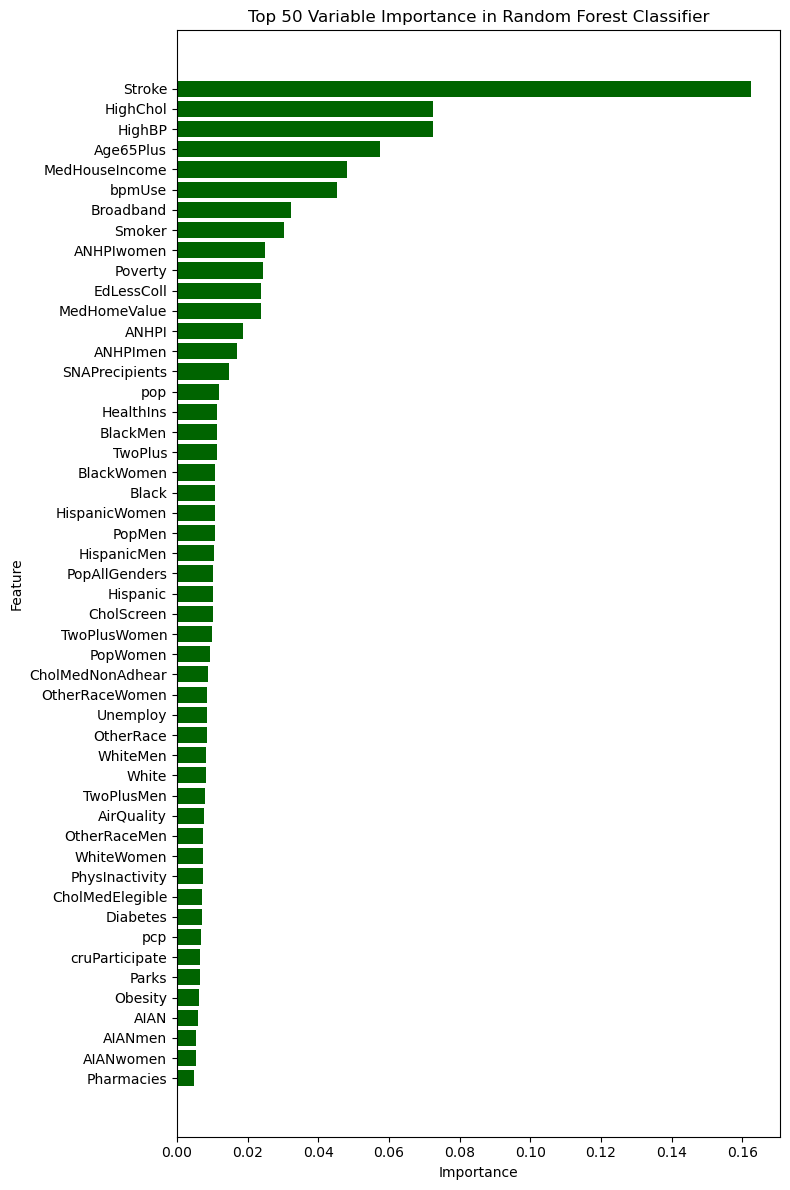

In [46]:
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': best_rf_classifier.feature_importances_})

top_20_features = feature_importance_df.nlargest(50, 'Importance')

import matplotlib.pyplot as plt

# Create a horizontal bar plot with rotated axes
plt.figure(figsize=(8, 12))
plt.barh(top_20_features['Feature'], top_20_features['Importance'], color='darkgreen')
plt.gca().invert_yaxis()  # Invert the y-axis to show features at the top
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 50 Variable Importance in Random Forest Classifier')
plt.tight_layout()
plt.show()


## Confussion matrix

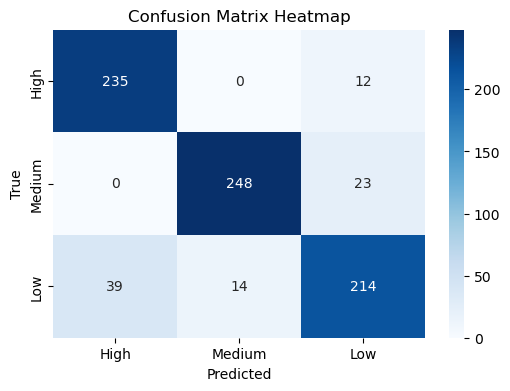

In [47]:
from sklearn.metrics import confusion_matrix

ypred = best_rf_classifier.predict(Xtest)

conf_matrix = confusion_matrix(ytest, ypred)

class_names = ['low', 'medium', 'high']
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)


import seaborn as sns
import matplotlib.pyplot as plt

# Set the labels for the heatmap
labels = ['High','Medium','Low']

# Create the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()


## Random Forest - Other Analysis

### y value counts

In [48]:
ytest.value_counts()

Low       271
Medium    267
High      247
Name: CHD_Class, dtype: int64

### Heatmap - CHD/Rural

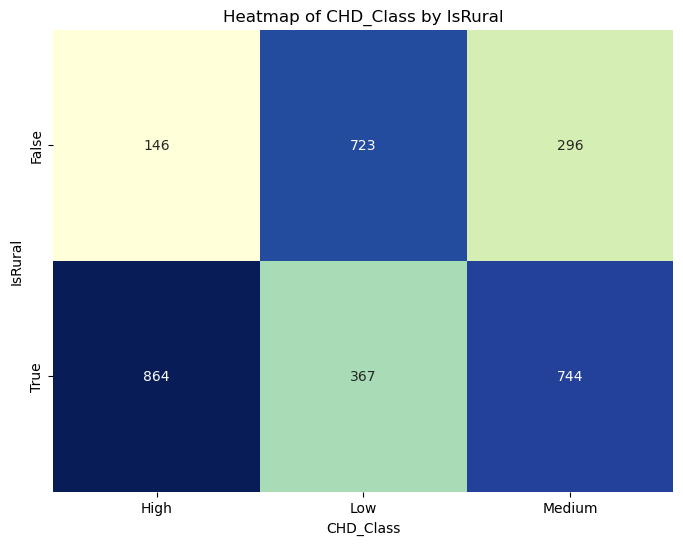

In [49]:
contingency_table = pd.crosstab(chd['IsRural'], chd['CHD_Class'], margins=True, margins_name='Total')

# Drop the 'Total' row and column if needed
contingency_table.drop('Total', axis=0, inplace=True)
contingency_table.drop('Total', axis=1, inplace=True)

# Create the heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.xlabel('CHD_Class')
plt.ylabel('IsRural')
plt.title('Heatmap of CHD_Class by IsRural')
plt.show()

### Split Urban Rural and Redo Analysis

In [50]:
def get_variable_importance(data):
    # Separate the target variable 'CHD_Class' from the features
    X = data.drop(columns=['CHD_Class'])
    y = data['CHD_Class']
    
    # Get the character columns that need to be dummy encoded
    char_cols = X.select_dtypes(include=['object']).columns

    # Create a one-hot encoder and apply it to the character columns
    encoder = OneHotEncoder()
    X = pd.get_dummies(X, columns=char_cols, drop_first=True)

    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)
    
    rf_classifier = RandomForestClassifier()

    param_dist = {
        'n_estimators': randint(1, 1000),
        'max_depth': randint(1, 50),
        'min_samples_split': randint(2, 10),
        'min_samples_leaf': randint(1, 10),
        'bootstrap': [True, False],
        'criterion': ['gini', 'entropy']
    }
    
    
    random_search = RandomizedSearchCV(
        estimator=rf_classifier,
        param_distributions=param_dist,
        n_iter=50,  # Adjust the number of iterations as needed
        cv=5,        # Number of cross-validation folds
        n_jobs=-1,   # Use all available CPU cores for parallel processing
        random_state=42,
        verbose=True
    )

    random_search.fit(Xtrain, ytrain)
    
    best_rf_classifier = random_search.best_estimator_
    
    accuracy = best_rf_classifier.score(Xtest, ytest)
    print("Accuracy of the Random Forest Classifier: {:.2f}%".format(accuracy * 100))
    
    # Create a DataFrame to store the feature names and their corresponding importance scores
    feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': best_rf_classifier.feature_importances_})

    # Sort the DataFrame in descending order based on importance
    feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

    return feature_importance_df

### Model Accuracies

In [51]:
# Create separate datasets for IsRural=True and IsRural=False
data_rural = chd[chd['IsRural'] == True]
data_non_rural = chd[chd['IsRural'] == False]

# Get variable importance for IsRural=True
result_rural = get_variable_importance(data_rural)

# Get variable importance for IsRural=False
result_non_rural = get_variable_importance(data_non_rural)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Accuracy of the Random Forest Classifier: 88.87%
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Accuracy of the Random Forest Classifier: 88.70%


### Variable importance in models

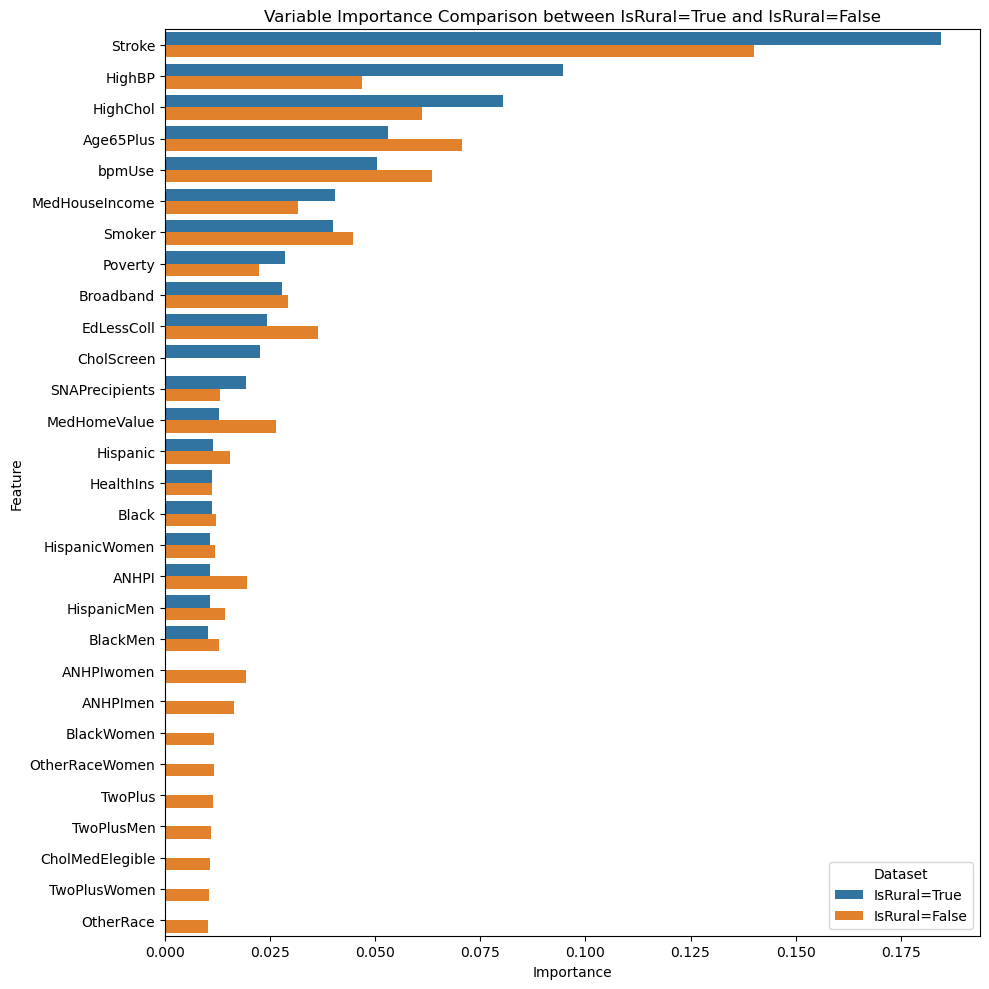

In [52]:
# Add a new column to each DataFrame to indicate the dataset (IsRural=True or IsRural=False)
result_rural['Dataset'] = 'IsRural=True'
result_non_rural['Dataset'] = 'IsRural=False'

# Concatenate the two DataFrames into a single DataFrame
combined_result = pd.concat([result_rural, result_non_rural,], ignore_index=True)

combined_result = combined_result[combined_result['Importance'] > 0.01]

# Create a bar plot with rotated axes
plt.figure(figsize=(10, 10))
sns.barplot(x='Importance', y='Feature', hue='Dataset', data=combined_result)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Variable Importance Comparison between IsRural=True and IsRural=False')
plt.legend(title='Dataset', loc='lower right')
plt.tight_layout()
plt.show()


# Machine Learning Models - Support Vector Machine

## SVM - Setup

### Data Loading and Preprocessing

In [53]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load data
chd = pd.read_csv("data/CDC_python_clean.csv")

# Drop unnecessary columns
columns_to_drop = ['fips', 'CHD', 'county', 'UrbanRural']
chd = chd.drop(columns=columns_to_drop)

# Define features and target
X = chd.drop(columns=['CHD_Class'])
y = chd['CHD_Class']

# One-hot encode categorical variables
char_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=char_cols, drop_first=True)

# Scale numerical variables
numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

X.head(), y.head()


(   Age65Plus      AIAN   AIANmen  AIANwomen     ANHPI  ANHPImen  ANHPIwomen  \
 0  -0.445838 -0.068777 -0.075373  -0.062421  0.990972  1.025591    0.960094   
 1  -0.320688  0.056428  0.152814  -0.033582  0.615752  0.620306    0.611373   
 2  -1.509615  0.743369  0.950305   0.548247  2.357646  2.537354    2.199181   
 3  -0.237254 -0.185011 -0.182117  -0.187150 -0.074985 -0.070168   -0.079142   
 4  -0.988156  0.297119  0.428957   0.173339  0.521227  0.515715    0.525699   
 
       Black  BlackMen  BlackWomen  ...  state_UT  state_VA  state_VT  \
 0  0.076628  0.088451    0.066900  ...         0         0         0   
 1  0.562760  0.578816    0.549019  ...         0         0         0   
 2  1.261923  1.321092    1.212223  ...         0         0         0   
 3 -0.142450 -0.140980   -0.143484  ...         0         0         0   
 4  1.967251  1.977040    1.957000  ...         0         0         0   
 
    state_WA  state_WI  state_WV  state_WY  region_Northeast  region_South  \


### Data Splitting

In [54]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)

Xtrain.shape, Xtest.shape

((2355, 109), (785, 109))

## SVM - Modeling

### Model Building and Hyperparameter Tuning

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the SVC classifier
svc = SVC(kernel='linear')

# Define the parameter grid for the GridSearchCV
param_grid = {
    'C': [0.1, 1],
}

# Define the GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    cv=5,        # Number of cross-validation folds
    n_jobs=-1,   # Use all available CPU cores for parallel processing
    verbose=True
)

# Fit the GridSearchCV to the training data
grid_search.fit(Xtrain, ytrain)


Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.1, 1]}, verbose=True)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

# Random Forest - Model Results

## Model Evaluation

In [56]:
from sklearn.metrics import accuracy_score

# Get the best SVC classifier
best_svc = grid_search.best_estimator_

# Predict the test set results
svc_pred = best_svc.predict(Xtest)

# Compute the accuracy of the SVC classifier
svc_accuracy = accuracy_score(ytest, svc_pred)

svc_accuracy


0.9210191082802548

## Feature Importance Plot

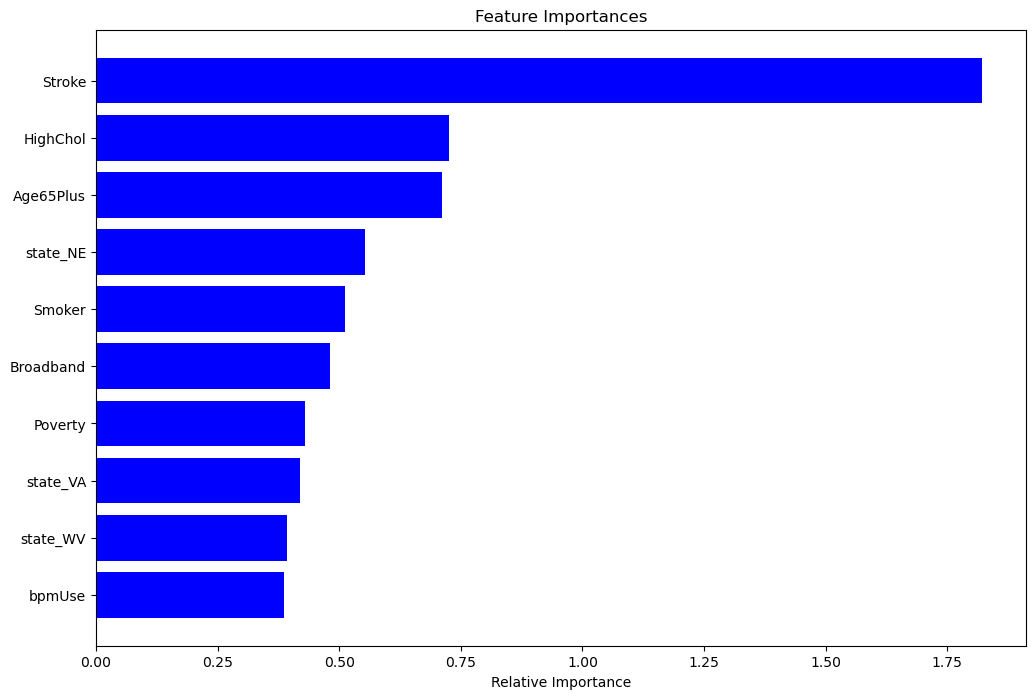

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances (use absolute values of coefficients as proxy)
importances = abs(best_svc.coef_[0])

# Get top 10 features
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Confusion Matrix and Plot

Text(50.722222222222214, 0.5, 'True')

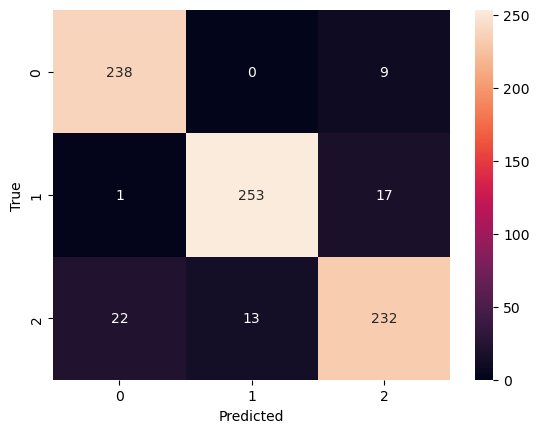

In [58]:
# Import the required libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Use the sklearn function confusion_matrix to compute the confusion matrix
svc_cm = confusion_matrix(ytest, svc_pred)

# Using seaborn to create a heatmap. The heatmap will visually represent the confusion matrix
# Each cell in the heatmap corresponds to a cell in the confusion matrix.
# The color of the cell is proportional to the number of instances.
sns.heatmap(svc_cm, annot=True, fmt='d')

# Label the x-axis as 'Predicted'
plt.xlabel('Predicted')

# Label the y-axis as 'True'
plt.ylabel('True')


# Machine Learning Models - K Means Clustering

## K-Means - Setup

### Import libraries

In [59]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Import data

In [60]:
df = pd.read_csv('data/CDC_python_clean.csv')
df = df.loc[df.CHD > 0]

### View data structures

In [61]:
# Display the first few rows of the dataset
df.head()

,fips,Age65Plus,AIAN,AIANmen,AIANwomen,ANHPI,ANHPImen,ANHPIwomen,Black,BlackMen,...,MedHouseIncome,Poverty,Unemploy,UrbanRural,county,state,pcp,IsRural,CHD_Class,region
0,34027,17.1,446,213,233,39922,19200,20722,13116,6312,...,114000.0,4.7,5.0,LargeFringe_Urban,Morris,NJ,1.0,False,Low,Northeast
1,34025,17.7,781,508,273,26636,12508,14128,33615,15605,...,104000.0,5.9,5.5,LargeFringe_Urban,Monmouth,NJ,0.8,False,Low,Northeast
2,34017,12.0,2619,1539,1080,88314,44162,44152,63097,29672,...,77000.0,13.1,6.8,Large_Urban,Hudson,NJ,1.8,False,Low,Northeast
3,34041,18.1,135,75,60,2178,1107,1071,3878,1964,...,80000.0,7.3,5.5,MediumSmall_Urban,Warren,NJ,1.6,False,Low,Northeast
4,34039,14.5,1425,865,560,23289,10781,12508,92839,42103,...,83000.0,9.2,6.7,Large_Urban,Union,NJ,1.5,False,Low,Northeast


## K-means - Data Cleaning (Preprocessing)

### Selecting columns

In [62]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Remove the 'fips' column as it's a unique identifier, not a meaningful numerical feature
numerical_cols = numerical_cols.drop('fips')

# Subset the dataframe on these columns
df_numerical = df[numerical_cols]

### Normalize the data

In [63]:
# Normalize the data
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_numerical), columns=df_numerical.columns)

df_normalized.head()

,Age65Plus,AIAN,AIANmen,AIANwomen,ANHPI,ANHPImen,ANHPIwomen,Black,BlackMen,BlackWomen,...,AirQuality,Parks,Broadband,EdLessColl,SNAPrecipients,MedHomeValue,MedHouseIncome,Poverty,Unemploy,pcp
0,-0.445838,-0.068777,-0.075373,-0.062421,0.990972,1.025591,0.960094,0.076628,0.088451,0.066900,...,-0.976009,0.846820,-1.717885,-3.368287,-1.483495,2.988556,3.877516,-1.666923,0.193532,-0.423358
1,-0.320688,0.056428,0.152814,-0.033582,0.615752,0.620306,0.611373,0.562760,0.578816,0.549019,...,0.750144,0.467575,-1.463161,-2.544027,-1.184063,2.720466,3.191663,-1.445597,0.477102,-0.423977
2,-1.509615,0.743369,0.950305,0.548247,2.357646,2.537354,2.199181,1.261923,1.321092,1.212223,...,1.166802,2.068833,-1.099269,-2.204019,0.103495,2.382872,1.339860,-0.117641,1.214384,-0.420881
3,-0.237254,-0.185011,-0.182117,-0.187150,-0.074985,-0.070168,-0.079142,-0.142450,-0.140980,-0.143484,...,0.988234,0.931097,-1.172048,-1.225211,-0.944517,1.042426,1.545616,-1.187384,0.477102,-0.421500
4,-0.988156,0.297119,0.428957,0.173339,0.521227,0.515715,0.525699,1.967251,1.977040,1.957000,...,1.583459,2.068833,-0.990102,-1.493095,-0.794801,2.164429,1.751372,-0.836951,1.157670,-0.421810


After normalizing the numerical features in the dataset each feature now has a mean of 0 and a standard deviation of 1. This ensures that all features contribute equally to the clustering process, regardless of their original scale.

### Determining how many clusters to use

### Using Elbow method

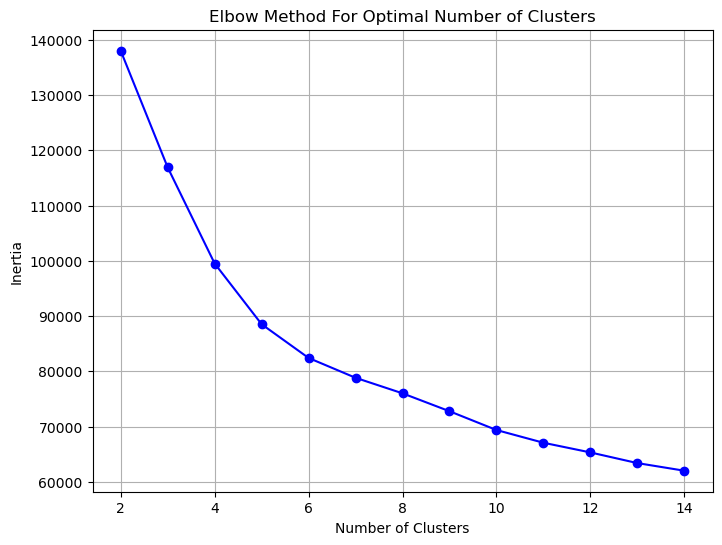

In [64]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Set a range of clusters to try out
clusters_range = range(2, 15)

# List to hold the inertia for each number of clusters
inertias = []

# Perform K-means for each number of clusters and store the inertia
for num_clusters in clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df_normalized)
    inertias.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(clusters_range, inertias, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.grid(True)
plt.show()


The Elbow Method plot shows the inertia (sum of squared distances to the nearest cluster center) as a function of the number of clusters. From the plot, it's not entirely clear where the "elbow" is, as there isn't a sharp bend. This often happens with real-world data, which may not have well-separated clusters. However, we can see that the inertia starts to decrease at a slower rate from around 4 clusters onwards. Therefore, we'll choose 4 as the number of clusters for our K-means clustering.

## K-Means - Modeling

In [65]:
# Perform K-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_normalized)

# Get the cluster assignments for each data point
cluster_assignments = kmeans.labels_

# Add the cluster assignments back to the original DataFrame
df['Cluster'] = cluster_assignments

df.head()


,fips,Age65Plus,AIAN,AIANmen,AIANwomen,ANHPI,ANHPImen,ANHPIwomen,Black,BlackMen,...,Poverty,Unemploy,UrbanRural,county,state,pcp,IsRural,CHD_Class,region,Cluster
0,34027,17.1,446,213,233,39922,19200,20722,13116,6312,...,4.7,5.0,LargeFringe_Urban,Morris,NJ,1.0,False,Low,Northeast,1
1,34025,17.7,781,508,273,26636,12508,14128,33615,15605,...,5.9,5.5,LargeFringe_Urban,Monmouth,NJ,0.8,False,Low,Northeast,1
2,34017,12.0,2619,1539,1080,88314,44162,44152,63097,29672,...,13.1,6.8,Large_Urban,Hudson,NJ,1.8,False,Low,Northeast,0
3,34041,18.1,135,75,60,2178,1107,1071,3878,1964,...,7.3,5.5,MediumSmall_Urban,Warren,NJ,1.6,False,Low,Northeast,1
4,34039,14.5,1425,865,560,23289,10781,12508,92839,42103,...,9.2,6.7,Large_Urban,Union,NJ,1.5,False,Low,Northeast,1


We have successfully performed K-means clustering and assigned each data point to one of four clusters.  

### Calculate the mean values

In [66]:
# Calculate the mean values of our features within each cluster
cluster_characteristics = df.groupby('Cluster').mean()
cluster_characteristics.transpose()

Cluster,0,1,2,3
fips,2.623861e+04,30818.709951,6037.0,30180.962937
Age65Plus,1.451136e+01,18.532646,13.6,20.365788
AIAN,6.031023e+03,468.153519,61292.0,438.150392
AIANmen,2.982455e+03,231.899879,31146.0,213.125445
AIANwomen,3.048568e+03,236.253641,30146.0,225.024947
ANHPI,1.081277e+05,2482.338592,1263567.0,218.282965
ANHPImen,5.101868e+04,1159.301578,577195.0,97.368496
ANHPIwomen,5.710899e+04,1323.037015,686372.0,120.914469
Black,1.713742e+05,6184.191141,651221.0,3645.394155
BlackMen,7.813853e+04,2984.700850,302532.0,1752.470421


The table above shows the average values of each feature for each cluster. This can help us understand the distinguishing characteristics of each cluster.

## K-Means - Model Results

### Silhouette score

In [67]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
sil_score = silhouette_score(df_normalized, cluster_assignments)

sil_score

0.16659025768870228

The silhouette score for our clustering is approximately 0.167. This score is relatively low, indicating that the clusters are not very clearly separated and that the samples within each cluster are not extremely dense. This is not surprising considering that we have used a high-dimensional dataset with many features, which can make it challenging to form distinct clusters.

## K-Means - Overall Results

We described the characteristics of each cluster by examining the mean of each feature within the clusters. This gave us some insights into the health and socio-economic conditions in each cluster, especially in terms of urban and rural differences. The k-means clustering shows a silhouette score of approximately 0.167. This score is relatively low, indicating that the clusters are not very clearly separated and that the samples within each cluster are not extremely dense. This is not surprising considering that we have used a high-dimensional dataset with many features, which can make it challenging to form distinct clusters.

# Results

Through our exploratory data analysis, we found interesting patterns and distributions in the data, such as, you can see a positive correlation between coronary heart disease (CHD) and people who smoke, and with people who have had a stroke. Also see that as poverty rates increase there is an association that prevalence of CHD also goes up. When you look at median household income, as income rises prevalence of coronary heart disease goes down.

Our machine learning models yielded promising results. The SVM model achieved an accuracy of approximately 92.1%, while the Random Forest model achieved an accuracy of approximately 89.4%. Therefore, the SVM model performed slightly better on this dataset. The k-means clustering shows a silhouette score of approximately 0.167. This score is relatively low, indicating that the clusters are not very clearly separated and that the samples within each cluster are not extremely dense. This is not surprising considering that we have used a high-dimensional dataset with many features, which can make it challenging to form distinct clusters.

# Discussions and Implications

The difference in performance between the SVM and Random Forest models could be attributed to the specific properties of these algorithms. SVMs tend to perform well on high-dimensional data, while Random Forests are often better suited for datasets with a mix of categorical and numerical features. The k-means clustering results provide additional insights into the structure of the dataset, potentially informing feature engineering and selection processes.

These findings highlight the potential of machine learning in aiding the prediction of Coronary Heart Disease, which could have significant implications for early intervention and treatment planning.

# Conclusion

In conclusion, our project demonstrates the feasibility and potential of using machine learning for predicting Coronary Heart Disease. The findings suggest that machine learning, and specifically SVM, can provide a valuable tool in the field of health informatics. Future work could explore other algorithms, feature engineering techniques, and larger or more diverse datasets to further improve prediction performance.These findings suggest that machine learning can be a valuable tool in health informatics, providing insights that can aid in early disease prediction and intervention.

# References

1. Scikit-learn: Machine Learning in Python (https://scikit-learn.org/stable/index.html)
2. CDC Dataset (https://nccd.cdc.gov/DHDSPAtlas/?state=County)

# Appendix: List of Contributors

1. Hans LehnDorff - [LinkedIn](https://www.linkedin.com/in/hans-lehndorff/)
2. Isaac Johnson - [LinkedIn](https://www.linkedin.com/in/isaacajohnson/)
3. Jesse DeBolt - [LinkedIn](https://www.linkedin.com/in/jessedebolt/)